<a href="https://colab.research.google.com/github/priya122000/-CrackYourInternship/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install tensorflow.gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 438 kB 59.0 MB/s 
     |████████████████████████████████| 1.6 MB 53.4 MB/s 
     |████████████████████████████████| 5.8 MB 49.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [18]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [19]:
# import some basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
# divide the Independent and dependent feature
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]


In [22]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [23]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [24]:
# feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [25]:
#concatenate these variable with dataframe
#first we drop Geography and Gender column
x=x.drop(['Geography','Gender'],axis=1) #drop the column not row

In [26]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [27]:

x=pd.concat([x,geography,gender],axis=1) #we really need to handle this categorical features

In [28]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
x_train


array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [32]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [33]:

x_train.shape

(8000, 11)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [35]:
#initalize the ANN
classifier=Sequential()


In [36]:
# adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [37]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu')) 

In [38]:
# adding the second hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [39]:
# adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [40]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics='Accuracy')

In [41]:
import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [42]:
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [43]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
531/536 [============================>.] - ETA: 0s - loss: 0.4404 - Accuracy: 0.8066

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
536/536 [==============================] - 4s 5ms/step - loss: 0.4395 - Accuracy: 0.8069 - val_loss: 0.4005 - val_Accuracy: 0.8243
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3659 - Accuracy: 0.8545 - val_loss: 0.3782 - val_Accuracy: 0.8451
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3553 - Accuracy: 0.8515 - val_loss: 0.3722 - val_Accuracy: 0.8459
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3506 - Accuracy: 0.8569 - val_loss: 0.3755 - val_Accuracy: 0.8417
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3447 - Accuracy:

In [45]:
model_history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

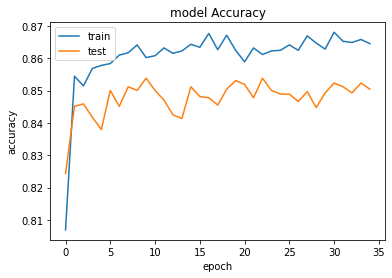

In [49]:
# summarize history for accuracy
plt.plot(model_history.history['Accuracy'])
plt.plot(model_history.history['val_Accuracy'])
plt.title('model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

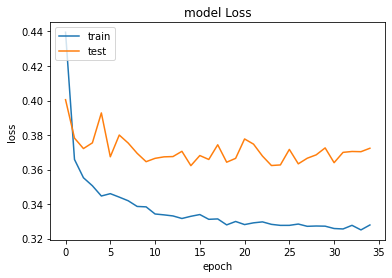

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [53]:
# Part-3
#prediction and evaluating the model
# prediction the test results
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [54]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1540,   55],
       [ 229,  176]])

In [55]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [57]:
score*100

85.8

In [58]:
## get the weights
classifier.get_weights()

[array([[ 5.91127038e-01, -3.84916961e-01, -5.38076401e-01,
          1.45866737e-01,  1.53532118e-01, -3.53622168e-01,
          2.87628174e-01, -5.76118171e-01, -6.92112222e-02,
          1.61502755e+00, -4.27654326e-01],
        [-4.20439154e-01, -2.95108366e+00, -2.18363091e-01,
          1.64144546e-01, -1.04760456e+00,  2.89277029e+00,
          8.85027528e-01, -6.38649225e-01,  3.13105166e-01,
         -1.40349531e+00,  1.93430078e+00],
        [ 5.86785853e-01, -1.52339682e-01,  5.95158577e-01,
         -1.49856672e-01,  9.34935987e-01, -4.14227486e-01,
          4.15258080e-01, -4.95060593e-01,  6.23946115e-02,
         -5.40368594e-02,  1.77871689e-01],
        [-1.65893459e+00,  1.51401162e-01, -2.66980243e+00,
         -2.19017744e+00, -1.37877440e+00,  4.39124137e-01,
          4.71501142e-01, -1.39714730e+00,  1.19048786e+00,
         -1.57505423e-01, -6.41050100e-01],
        [ 2.20162916e+00,  4.05031264e-01, -2.38285446e+00,
         -3.76661277e+00, -6.93023503e-01, -

In [ ]:
## END ##